
Images shape: (11151, 32, 32, 3)
Labels shape: (11151, 2)



Epoch 1/50


278/278 [==============================] - 32s 82ms/step - loss: 1.2446 - accuracy: 0.5621 - val_loss: 0.7318 - val_accuracy: 0.5276
Epoch 2/50
278/278 [==============================] - 19s 69ms/step - loss: 0.6725 - accuracy: 0.5784 - val_loss: 0.8297 - val_accuracy: 0.1170
Epoch 3/50
278/278 [==============================] - 25s 87ms/step - loss: 0.6737 - accuracy: 0.5639 - val_loss: 0.8063 - val_accuracy: 0.3039
Epoch 4/50
278/278 [==============================] - 20s 71ms/step - loss: 0.6672 - accuracy: 0.5797 - val_loss: 0.7549 - val_accuracy: 0.3429
Epoch 5/50
278/278 [==============================] - 19s 69ms/step - loss: 0.6594 - accuracy: 0.5850 - val_loss: 0.7161 - val_accuracy: 0.5733
Epoch 6/50
278/278 [==============================] - 19s 70ms/step - loss: 0.6631 - accuracy: 0.5864 - val_loss: 0.7449 - val_accuracy: 0.5585
Epoch 7/50
278/278 [==============================] - 17s 60ms/step - lo

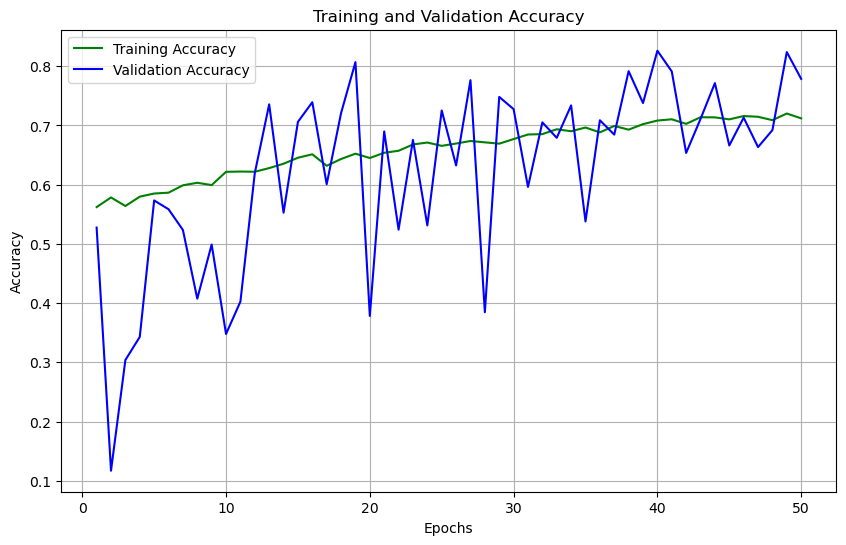

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

angry_dir = "angry/"  
neutral_dir = "neutral/" 

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

images = []
labels = []

for filename in os.listdir(angry_dir):
    if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(angry_dir, filename))
        img = cv2.resize(img, (32, 32))
        images.append(img)
        labels.append([1, 0])  

for filename in os.listdir(neutral_dir):
    if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(neutral_dir, filename))
        img = cv2.resize(img, (32, 32))
        images.append(img)
        labels.append([0, 1])  

images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

split_ratio = 0.8  
split_index = int(len(images) * split_ratio)

train_images, val_images = images[:split_index], images[split_index:]
train_labels, val_labels = labels[:split_index], labels[split_index:]

datagen.fit(train_images)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, 
                    epochs=50, 
                    validation_data=(val_images, val_labels))

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
